In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})


print('-------')

print(s[s.isnull() == False])
print(df[df['value2'].notnull()])

-------
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   190.0      g


In [3]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

df2 = df['value1'].dropna()
df.dropna(inplace = True)
df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
7,54.0,f
10,190.0,g


In [4]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
s.replace([1,2,3],np.nan,inplace = True)


In [5]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})



u = s.mean()
me = s.median()
mod = s.mode()
s.fillna(mod,inplace = True)
s

0    12.0
1    33.0
2    45.0
3    23.0
4    54.0
5    66.0
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64

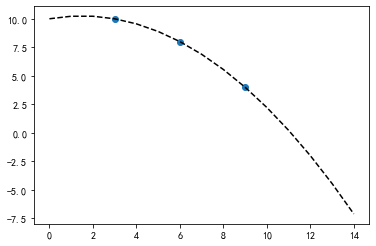

In [6]:
from scipy.interpolate import lagrange
x = [ 3,6,9]
y = [10,8,4]
plt.scatter(x,y)
df = pd.DataFrame({'x':np.arange(15)})
df['y'] = lagrange(x,y)(df['x'])

plt.plot(df['x'],df['y'],linestyle = '--', color = 'k')

0    44.748806
1    52.701333
2    45.011587
3          NaN
4    61.632391
dtype: float64
缺失数据占比 9.00%
-------------
0     44.748806
1     52.701333
2     45.011587
3           NaN
4     61.632391
        ...    
95    25.579260
96    27.473920
97    66.579890
98    50.294059
99    11.925635
Length: 100, dtype: float64


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

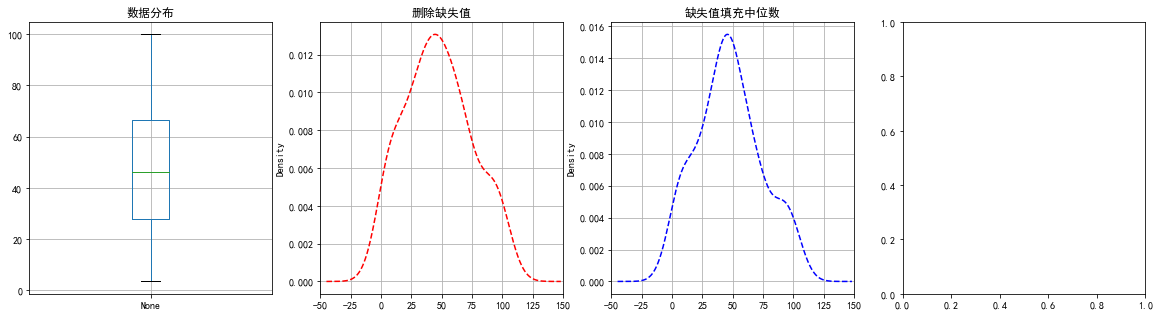

In [43]:
data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
data.reindex()
print(data.head())
data_na = data[data.isnull()]
print('缺失数据占比 %.2f%%' % (len(data_na)/len(data)*100))

data_c = data.fillna(data.median())
fig, axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0] ,grid = True, title = '数据分布')
data.plot(kind = 'kde', style = '--r', ax = axes[1], grid = True, title = '删除缺失值', xlim = [-50,150])
data_c.plot(kind = 'kde', style = '--b', ax = axes[2], grid = True, title = '缺失值填充中位数', xlim = [-50, 150])
print('-------------')
print(data)
   
def na_c(s,n,k=5):
    y = s.reindex(list(range(n-k, n)) + list(range(n+1, n+1+k))) #取数
#     y = s[list(range(n-k,n+1+k))] # 取数
    y = y[y.notnull()]  # 剔除空值
    return(lagrange(y.index,list(y))(n))
# 创建函数，做插值，由于数据量原因，以空值前后5个数据（共10个数据）为例做插值

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(na_c(data,i))
        na_re.append(data[i])
data.dropna(inplace=True)  # 清除插值后仍存在的缺失值
data.plot(kind = 'kde',style = '--k',ax = axes[3],grid = True,title = '拉格朗日插值后',xlim = [-50,150])
print('finished!')
# 缺失值插值


In [28]:

print(data.reindex())

0     62.568726
1      5.029158
2     64.065059
3           NaN
4     34.947336
        ...    
95    66.015736
96    41.997893
97    19.917331
98    98.960544
99     5.609730
Length: 100, dtype: float64
